No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


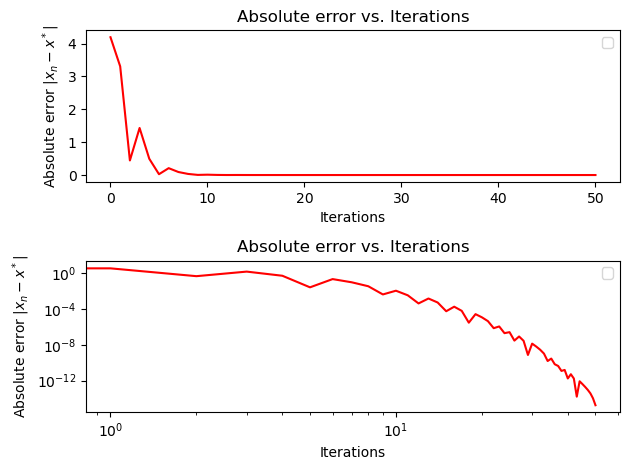

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time

N = 50 #number of iterations, adjusted to # of iterations for slowest converging algorithm
epsilon = 1e-8 #tolerance, checked against absolute error
test = 1 #test function selection

#define function
def my_fun(x, test):
    if test == 1:
        y = (x ** (7/5) - 1)/9 - 3
    return y
def sgn(x): #signum function
    if x < 0:
        return -1
    if x == 0:
        return 0
    if x > 0:
        return 1
#bisection method
def Bisection(a, b): #based on algorithm 2.1
    #lower endpoint a, upper endpoint b
    i = 0 #iteration
    p = a + (b - a)/2 #initial approximation
    p_arr = np.array([]) #store approximations
    while i <= N  or np.abs(my_fun(p, test)) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        p = a + (b - a)/2
        p_arr = np.append(p_arr, p)
        if sgn(my_fun(p, test)) == 0: #if exact root found, set endpoints to root
            a, b = p, p
        elif sgn(my_fun(a, test)) * sgn(my_fun(p, test)) > 0:
            a = p
        else:
            b = p
    return p_arr

if test == 1:
    p_bisection = Bisection(0, 30)
fig, (ax1, ax2) = plt.subplots(2, 1)

#plot absolute error vs iterations
ax1.plot(np.abs(p_bisection - 28 ** (5/7)), "r-")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Absolute error $|x_n - x^*|$")
ax1.set_title("Absolute error vs. Iterations")
ax1.legend()

#plot log of absolute error vs log of iterations
ax2.plot(np.abs(p_bisection - 28 ** (5/7)), "r-")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Absolute error $|x_n - x^*|$")
ax2.set_title("Absolute error vs. Iterations")
ax2.legend()
ax2.loglog()
fig.tight_layout()
plt.show()

In [17]:
#initialize matrices
def matrix_init(n, test):
    #dimensions of matrices n
    if test == 1:
        A = 7 * np.eye(n) + 1/10 * (np.eye(n)[np.random.permutation(n),:] + np.random.normal(size = (n, n)))
    return A

#gaussian elimination without pivoting
def Gaussian_Elim(A, b): #based on algorithm 6.1
    #coefficient of unknowns matrix A, constants matrix b
    for i in range(n - 1):
        for j in range(i + 1, n):
          m = A[j][i]/A[i][i]
          A[j] = A[j] - m * A[i]
          b[j] = b[j] - m * b[i]
    if A[n-1][n-1] == 0:
        print("no unique solution exists")
    return A, b

#back substitution of upper triangular matrix
def Backsolve(A, b): #based on algorithm 6.1
    #coefficient of unknowns matrix A, constants matrix b
    x = np.zeros((n,1))
    for i in range(n - 1, -1, -1):
        x_i = b[i]
        for j in range(i + 1, n):
            x_i = x_i - A[i][j] * x[j]
        x[i] = x_i/A[i][i]
    return x

#compute LU factorization of matrix
def LU_factorize(A): #based on algorithm 6.4
    #coefficient of unknowns matrix A
    L = np.eye(n, dtype=np.float32) #set L_ii to 1 (identity matrix)
    U = np.zeros((n, n), dtype=np.float32) #initialize U
    for i in range(n):
        for j in range(i, n):
            u_ij = A[i][j] - np.dot(L[i,:], U[:,j])
            l_ji = A[j][i] - np.dot(L[j,:], U[:,i])
            U[i][j] = u_ij
            L[j][i] = l_ji/U[i][i]
    return L, U

#front substitution of lower triangular matrix
def LU_solve(L, U, b): #based on algorithm 6.1
    #lower triangular matrix L, upper triangular matrix U, constants matrix b
    y = np.zeros((n, 1))
    for i in range(n): #front solve Ly = b for y
        y_i = b[i]
        for j in range(i):
            y_i = y_i - L[i][j] * y[j]
        y[i] = y_i/L[i][i]
    return Backsolve(U, y) #back solve Ux = y for x
#jacobi iteration
def Jacobi(A, b, x_0, n): #based on algorithm 7.1
    #coefficient of unknowns matrix A, constants matrix b, initial guess x0, matrix size n
    x = x_0
    x_t = 1 + x_0
    x_arr = np.array([np.linalg.norm(np.matmul(A, x) - b)])
    i = 0
    while True:
        x_t = x.copy()
        i += 1
        for j in range(n):
            x_t[j] = 1/A[j][j] * (-1 * (np.dot(A[j, :j], x[:j]) + np.dot(A[j, j+1:], x[j+1:])) + b[j])
        if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
            x = x_t.copy()
            x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
            break
        x = x_t.copy()
        x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
    return x, i, x_arr

#gauss seidel iteration
def Gauss_Seidel(A, b, x_0, n): #based on algorithm 7.2
    #coefficient of unknowns matrix A, constants matrix b, initial guess x0, matrix size n
    x = x_0
    x_t = 1 + x_0
    x_arr = np.array([np.linalg.norm(np.matmul(A, x) - b)])
    i = 0
    while True:
        i += 1
        x_t = x.copy()
        for j in range(n):
            x_t[j] = 1/A[j][j] * (-1 * (np.dot(A[j, :j], x_t[:j]) + np.dot(A[j, j+1:], x[j+1:])) + b[j])
        if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
            x = x_t.copy()
            x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
            break
        x = x_t.copy()
        x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
    return x, i, x_arr

test = 1

if test == 1:
    n = 100
    A = matrix_init(n, 1)
    L, U = LU_factorize(A)
    x_0 = np.zeros((n,1)) #initial guess
    time_gauss = np.array([])
    time_LU = np.array([])
    res_err_gauss = np.array([])
    res_err_LU = np.array([])
    time_jacobi = np.array([])
    time_gaussseidel = np.array([])
    res_err_jacobi = np.array([])
    res_err_gaussseidel = np.array([])
    for i in range(25):
        b = np.random.normal(size = (n, 1))
    
        A_copy = A.copy() #gaussian modifies passed array, create shallow copy
        b_copy = b.copy()

        t0_gauss = time.time()
        A_gauss, b_gauss = Gaussian_Elim(A_copy, b_copy)
        x_gauss = Backsolve(A_gauss, b_gauss)
        t1_gauss = time.time()
        time_gauss = np.append(time_gauss, t1_gauss - t0_gauss)
        res_err_gauss = np.append(res_err_gauss, np.linalg.norm(np.matmul(A, x_gauss) - b))

        t0_LU = time.time()
        x_LU = LU_solve(L, U, b)
        t1_LU = time.time()
        time_LU = np.append(time_LU, t1_LU - t0_LU)
        res_err_LU = np.append(res_err_LU, np.linalg.norm(np.matmul(A, x_LU) - b))

        t0_jacobi = time.time()
        x_jacobi, n_jacobi, x_arr_jacobi = Jacobi(A, b, x_0, n)
        t1_jacobi = time.time()
        time_jacobi = np.append(time_jacobi, t1_jacobi - t0_jacobi)
        res_err_jacobi = np.append(res_err_LU, np.linalg.norm(np.matmul(A, x_jacobi) - b))

        t0_gaussseidel = time.time()
        x_gaussseidel, n_gaussseidel, x_arr_gaussseidel = Gauss_Seidel(A, b, x_0, n)
        t1_gaussseidel = time.time()
        time_gaussseidel = np.append(time_gaussseidel, t1_gaussseidel - t0_gaussseidel)
        res_err_gaussseidel = np.append(res_err_LU, np.linalg.norm(np.matmul(A, x_gaussseidel) - b))
    print(np.mean(time_gauss), np.mean(time_LU), np.mean(time_jacobi), np.mean(time_gaussseidel))
    print(np.mean(res_err_gauss), np.mean(res_err_LU), np.mean(res_err_jacobi), np.mean(res_err_gaussseidel))

C:\Users\ravis\AppData\Local\Temp\ipykernel_6028\3547808303.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
C:\Users\ravis\AppData\Local\Temp\ipykernel_6028\3547808303.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:


0.13331791877746582 0.09060419082641602 0.036875343322753905 0.027681589126586914
5.3812670374090295e-15 1.904547607933304e-07 1.8334670603228903e-07 1.833788867850827e-07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


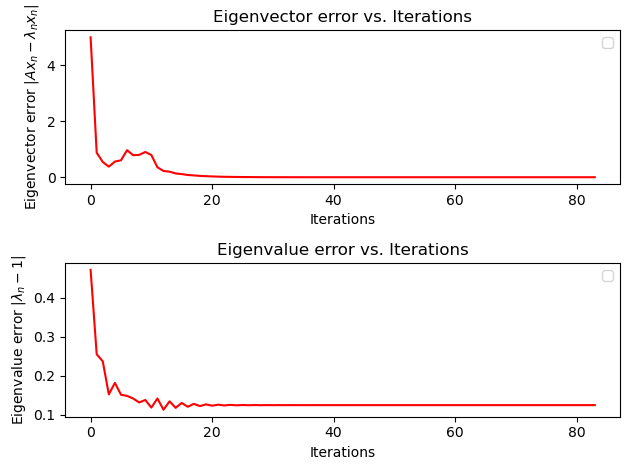

In [71]:
#initialize matrices
def matrix_init(n, test):
    #dimensions of matrices n
    if test == 1:
        B = 1/2 * np.random.normal(size = (n, n))
        Bt = np.transpose(B)
        A = -4 * np.eye(n) + B + Bt
    return A
def sp_inf(x):
    norm = np.linalg.norm(x, np.inf)
    for i in x:
        if abs(i) == norm:
            return i
#inverse power method
def inverse_power(A, x_0, n, s): #based on algorithm 9.3
    #matrix A, initial guess x_0
    x = x_0/sp_inf(x_0)
    B = A  - s * np.eye(n)
    L, U = LU_factorize(B)
    i = 0
    lamda = 1
    lamda_arr = np.array([])
    err_arr = np.array([])
    while True:
        i += 1
        x_t = x.copy()
        x_t = LU_solve(L, U, x_t) #solve using LU factorization
        lamda_prev = lamda
        lamda = sp_inf(x_t)
        x_t = x_t/sp_inf(x_t)
        lamda_arr = np.append(lamda_arr, 1/lamda + s)
        err_arr = np.append(err_arr, np.linalg.norm(np.dot(A, x_t) - (1/lamda + s) * x_t))
        if np.abs(lamda - lamda_prev) <= epsilon:
            x = x_t.copy()
            break
        x = x_t.copy()
    return lamda_arr, err_arr
        
test = 1
if test == 1:
    n = 100
    s = 1
    
    A = matrix_init(n, test)
    x_0 = np.ones((n, 1))
    
    #inverse power of A returns eigenvalue closest to 0,
    #inverse power of A - sI returns eigenvalue closest to s
    #for eigenvalue L, eigenvector v of A
    #Av = Lv, Av - sIv = Lv - sIv, (A - sI)v = (L - s)v
    eig_1, v_1 = inverse_power(A, x_0, n, s)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)

    #plot absolute error vs iterations
    ax1.plot(v_1, "r-")
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Eigenvector error $|Ax_n - \lambda_nx_n|$")
    ax1.set_title("Eigenvector error vs. Iterations")
    ax1.legend()

    #plot log of absolute error vs log of iterations
    ax2.plot(np.abs(eig_1 - s), "r-")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Eigenvalue error $|\lambda_n - 1|$")
    ax2.set_title("Eigenvalue error vs. Iterations")
    ax2.legend()
    fig.tight_layout()
    plt.show() 

C:\Users\ravis\AppData\Local\Temp\ipykernel_6028\2259926899.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([[1 - 2 * x[0], 4], [2*x[0] - 4, 8*x[1] - 12]], dtype=np.float32)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


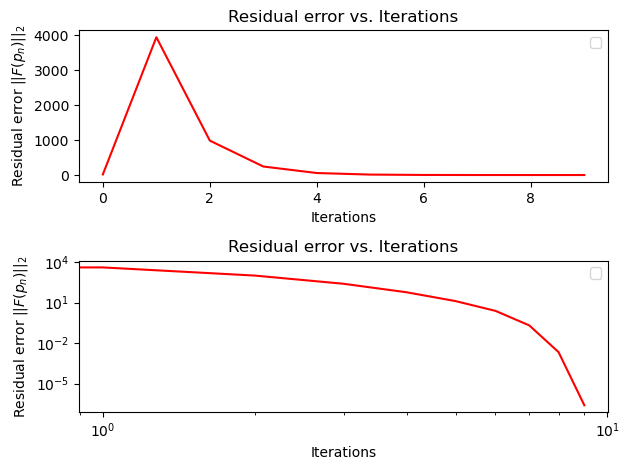

In [74]:
epsilon = 1e-6 #tolerance, checked against absolute error
def f(x, test): #system of nonlinear eqs
    if test == 1:
        return np.array([[x[0] - x[0] ** 2 + 4*x[1] - 12], [(x[0] - 2)**2 + (2*x[1] - 3)**2 - 25]], dtype=np.float32)

def j(x, test): #jacobian
    if test == 1:
        return np.array([[1 - 2 * x[0], 4], [2*x[0] - 4, 8*x[1] - 12]], dtype=np.float32)
def Newton(p): #based on algorithm 2.3
    #initial guess p
    i = 0 #iteration
    p_arr = np.array([np.linalg.norm(f(p, test))]) #store approximations
    while np.abs(np.linalg.norm(f(p, test))) > epsilon: #ensure algorithms run for same number of iterations
        i += 1
        ff, jj = Gaussian_Elim(j(p, test), -1 * f(p, test))
        p = p + Backsolve(ff, jj)
        p_arr = np.append(p_arr, np.linalg.norm(f(p, test)))
    return p_arr, p
if test == 1:
    n = 2 #number of eqs
    p_0 = np.array([[0], [0]], dtype=np.float32)
    res_err_newton, p_newton = Newton(p_0)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(res_err_newton, "r-")
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Residual error $||F(p_n)||_2$")
    ax1.set_title("Residual error vs. Iterations")
    ax1.legend()
    ax2.plot(res_err_newton, "r-")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Residual error $||F(p_n)||_2$")
    ax2.set_title("Residual error vs. Iterations")
    ax2.legend()
    ax2.loglog()
    fig.tight_layout()
    plt.show()